In [13]:
import pandas as pd
import numpy as np
from plotnine import *
import patchworklib as pw
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
os.chdir('D:\Studia\MoCaDR_proj1')

# Results for many r’s

In [14]:
# SVD1
res_svd1 = pd.read_csv('Results/results_svd1.csv')
res_svd1_long = pd.melt(res_svd1, id_vars=['r'], value_vars=res_svd1.columns[1:])
best_r = res_svd1_long.iloc[res_svd1_long['value'].idxmin()]['r']
best_rmse = res_svd1_long['value'].min()
# SVD2
res_svd2 = pd.read_csv('Results/results_svd2.csv')
res_svd2_long = pd.melt(res_svd2, id_vars=['r'], value_vars=res_svd2.columns[1:])
best_r2 = res_svd2_long.iloc[res_svd2_long['value'].idxmin()]['r']
best_rmse2 = res_svd2_long['value'].min()
# NMF
res_nmf = pd.read_csv('Results/results_nmf.csv')
res_nmf_long = pd.melt(res_nmf, id_vars=['r'], value_vars=res_nmf.columns[1:])
best_r3 = res_nmf_long.iloc[res_nmf_long['value'].idxmin()]['r']
best_rmse3 = res_nmf_long['value'].min()

## SVD 1

In [25]:
plot_svd1_1 = ggplot(res_svd1_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable'), size=1) + \
    labs(y="RMSE", color="Imputation method", title="SVD1") + \
    scale_color_manual(values=['#9A32CD', '#FF1493', '#66CD00', '#FF4040', '#00FFFF'],
                       labels=['0', 'Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_text=element_text(size=13), legend_title=element_text(size=13),
          axis_text=element_text(size=13), axis_title=element_text(size=13),
          plot_title=element_text(size=13))
plot_svd1_2 = ggplot(res_svd1_long[res_svd1_long['variable'] != 'rmse_0']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable'), size=1) + \
    labs(y="RMSE", color="Imputation method", title="SVD1") + \
    scale_color_manual(values=['#FF1493', '#66CD00', '#FF4040', '#00FFFF'], labels=['Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_position='none', axis_text=element_text(size=13),
          axis_title=element_text(size=13), plot_title=element_text(size=13))
plot_svd1_1.save('Report/fig/svd1_1.png')
plot_svd1_2.save('Report/fig/svd1_2.png')

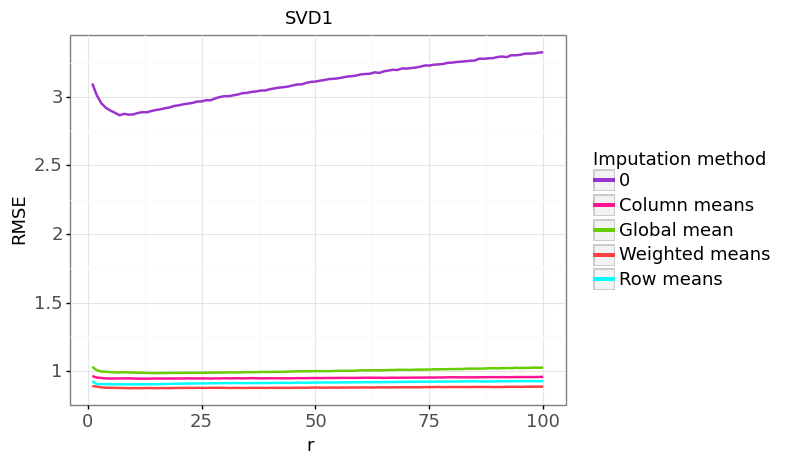

<ggplot: (84572512503)>

In [26]:
plot_svd1_1

# SVD2

In [27]:
plot_svd2_1 = ggplot(res_svd2_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable'), size=1) + \
    labs(y="RMSE", color="Imputation method", title="SVD2") + \
    scale_color_manual(values=['#9A32CD', '#FF1493', '#66CD00', '#FF4040', '#00FFFF'],
                       labels=['0', 'Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_text=element_text(size=13), legend_title=element_text(size=13),
          axis_text=element_text(size=13), axis_title=element_text(size=13),
          plot_title=element_text(size=13))
plot_svd2_2 = ggplot(res_svd2_long[res_svd2_long['variable'] != 'rmse_0']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable'), size=1) + \
    labs(y="RMSE", color="Imputation method", title="SVD2") + \
    scale_color_manual(values=['#FF1493', '#66CD00', '#FF4040', '#00FFFF'],
                       labels=['Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_position='none', axis_text=element_text(size=13),
          axis_title=element_text(size=13), plot_title=element_text(size=13))
plot_svd2_1.save('Report/fig/svd2_1.png')
plot_svd2_2.save('Report/fig/svd2_2.png')

In [5]:
n = 10
res_svd2_long

,r,variable,value
0,1,rmse_0,3.095144
1,2,rmse_0,3.006560
2,3,rmse_0,2.943416
3,4,rmse_0,2.903454
4,5,rmse_0,2.877835
...,...,...,...
495,96,rmse_col_means,0.957780
496,97,rmse_col_means,0.959530
497,98,rmse_col_means,0.958531
498,99,rmse_col_means,0.958267


# NMF

In [37]:
plot_nmf_1 = ggplot(res_nmf_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable'), size=1) + \
    labs(y="RMSE", color="Imputation method", title="NMF") + \
    scale_color_manual(values=['#9A32CD', '#FF1493', '#66CD00', '#FF4040', '#00FFFF'],
                       labels=['0', 'Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_text=element_text(size=13), legend_title=element_text(size=13),
          axis_text=element_text(size=13), axis_title=element_text(size=13),
          plot_title=element_text(size=13))

plot_nmf_2 = ggplot(res_nmf_long[res_nmf_long['variable'] != 'rmse_0']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable'), size=1) + \
    labs(y="RMSE", color="Imputation method", title="NMF") + \
    scale_color_manual(values=['#FF1493', '#66CD00', '#FF4040', '#00FFFF'],
                       labels=['Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_position='none', axis_text=element_text(size=13),
          axis_title=element_text(size=13), plot_title=element_text(size=13))
plot_nmf_1.save('Report/fig/nmf_1.png')
plot_nmf_2.save('Report/fig/nmf_2.png')

# Stop condition for SVD2

In [7]:
res_svd2_stop = pd.read_csv('Results/results_stop_svd2.csv')

In [8]:
n = 10
res_svd2_stop.loc[res_svd2_stop.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

,stop,r,RMSE
378,0.0086,9,0.879578
356,0.0085,9,0.880032
400,0.0087,9,0.880051
421,0.0088,8,0.880321
232,0.0079,17,0.880356
399,0.0087,8,0.880363
210,0.0078,17,0.880485
299,0.0082,18,0.880578
275,0.0081,16,0.880597
384,0.0086,15,0.880600


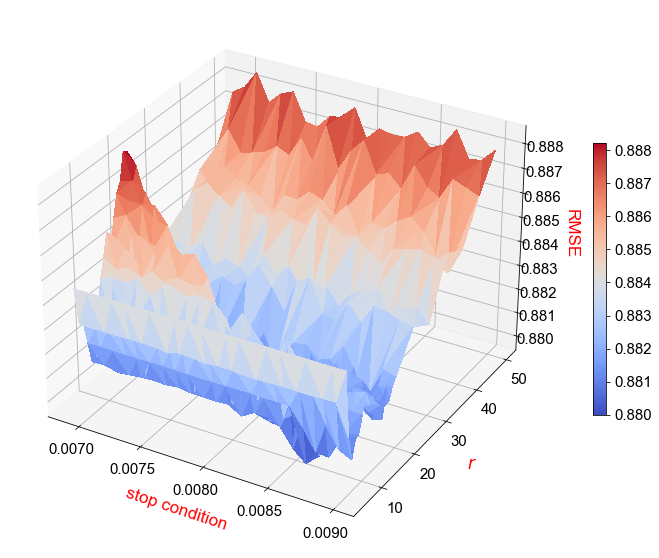

In [34]:
plt.rcParams.update({'font.size': 15})
X, Y, Z = res_svd2_stop.T.values
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm, edgecolor ='black', linewidth=0, antialiased=False)
ax.set_xlabel('stop condition', fontsize=17, color='red', labelpad=10)
ax.set_ylabel('$r$', fontsize=17, color='red', labelpad=10)
ax.set_zlabel('RMSE', rotation=-90, fontsize=17, color='red', labelpad=10)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=20)

# Two-dimensional minimization: r, col_weight

In [32]:
res_svd1_3d = pd.read_csv('Results/results_r_w_svd1.csv')
res_svd2_3d = pd.read_csv('Results/results_r_w_svd2.csv')
res_nmf_3d = pd.read_csv('Results/results_r_w_nmf.csv')

## SVD1

In [18]:
n = 10
res_svd1_3d.loc[res_svd1_3d.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

,col_weight,r,RMSE
423,0.39,10,0.873987
401,0.38,10,0.874244
489,0.42,10,0.874274
357,0.36,10,0.874449
424,0.39,11,0.874469
379,0.37,10,0.874475
467,0.41,10,0.874490
445,0.40,10,0.874498
466,0.41,9,0.874507
470,0.41,13,0.874532


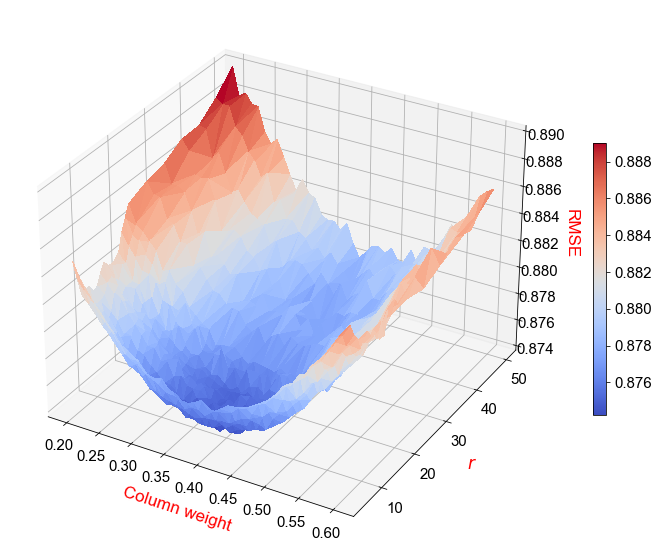

In [33]:
X, Y, Z = res_svd1_3d.T.values
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm, edgecolor ='black', linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=20)
ax.set_xlabel('Column weight', fontsize=17, color='red', labelpad=10)
ax.set_ylabel('$r$', fontsize=17, color='red', labelpad=10)
ax.set_zlabel('RMSE', rotation=-90, fontsize=17, color='red', labelpad=10)
plt.savefig('Report/fig/svd1_r_w.png')

## SVD2

In [13]:
n = 10
res_svd2_3d.loc[res_svd2_3d.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

,col_weight,r,RMSE
73,0.25,8,0.867393
87,0.26,8,0.867397
59,0.24,8,0.867402
101,0.27,8,0.867410
115,0.28,8,0.867494
45,0.23,8,0.867501
31,0.22,8,0.867509
129,0.29,8,0.867578
17,0.21,8,0.867675
143,0.30,8,0.867697


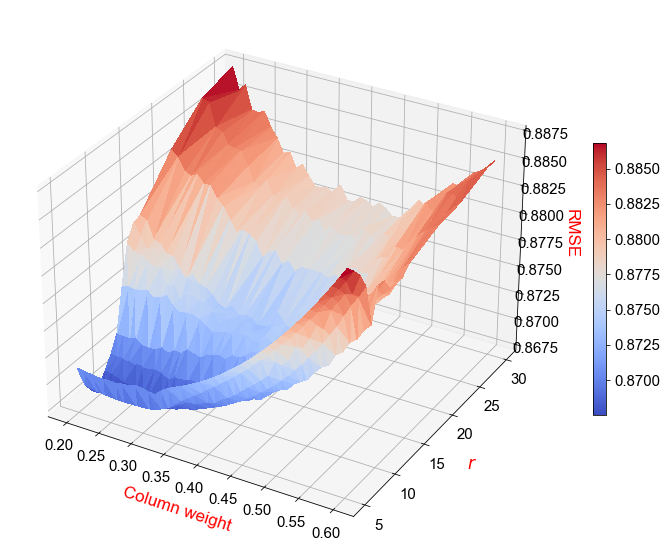

In [35]:
X2, Y2, Z2 = res_svd2_3d.T.values
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X2, Y2, Z2, cmap=cm.coolwarm, edgecolor ='black', linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=20)
ax.set_xlabel('Column weight', fontsize=17, color='red', labelpad=10)
ax.set_ylabel('$r$', fontsize=17, color='red', labelpad=10)
ax.set_zlabel('RMSE', rotation=-90, fontsize=17, color='red', labelpad=10)
plt.savefig('Report/fig/svd2_r_w.png')

## NMF

In [19]:
n = 10
res_nmf_3d.loc[res_nmf_3d.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

,col_weight,r,RMSE
884,0.40,37,0.874794
927,0.41,37,0.874817
822,0.39,18,0.874841
841,0.39,37,0.874848
865,0.40,18,0.874849
779,0.38,18,0.874881
970,0.42,37,0.874892
908,0.41,18,0.874909
736,0.37,18,0.874958
798,0.38,37,0.874959


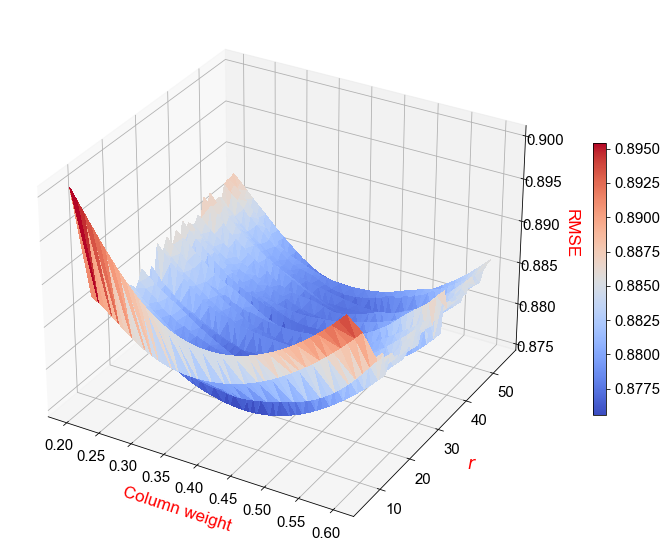

In [36]:
X3, Y3, Z3 = res_nmf_3d.T.values
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X3, Y3, Z3, cmap=cm.coolwarm, edgecolor='black', linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=20)
ax.set_xlabel('Column weight', fontsize=17, color='red', labelpad=10)
ax.set_ylabel('$r$', fontsize=17, color='red', labelpad=10)
ax.set_zlabel('RMSE', rotation=-90, fontsize=17, color='red', labelpad=10)
plt.savefig('Report/fig/nmf_r_w.png')

# SGD

## Brief view on results

In [10]:
res_sgd_all = pd.read_csv('Results/results_sgd_all.csv')
res_sgd_all.drop('index', inplace=True, axis=1)
res_sgd_all2 = pd.read_csv('Results/results_sgd_all_2021.csv')
res_sgd_all2.drop('index', inplace=True, axis=1)

In [9]:
res_sgd_all.sort_values('lambda')

,lambda,eta,r,RMSE
0,0.001,0.0001,1.0,1.062113
32,0.001,0.0100,5.0,0.974318
33,0.001,0.0500,5.0,1.045763
34,0.001,0.1000,5.0,1.244860
154,0.001,0.1000,50.0,1.428379
...,...,...,...,...
177,1.000,0.0100,50.0,1.079815
178,1.000,0.0500,50.0,1.365974
179,1.000,0.1000,50.0,1.560010
115,1.000,0.0001,15.0,1.068008


In [11]:
res_sgd_all2

,lambda,eta,r,RMSE
0,0.001,0.0001,1.0,1.060065
1,0.001,0.0010,1.0,1.015277
2,0.001,0.0100,1.0,0.967272
3,0.001,0.0500,1.0,1.051208
4,0.001,0.1000,1.0,1.410866
...,...,...,...,...
235,1.000,0.0001,100.0,1.065621
236,1.000,0.0010,100.0,1.066486
237,1.000,0.0100,100.0,1.119838
238,1.000,0.0500,100.0,1.271468


# Repeating for different splits

In [51]:
res_svd1_reps = pd.read_csv('Results/results_reps_svd1.csv')

In [56]:
res_svd1_reps.loc[res_svd1_reps.groupby('rep').idxmin()['RMSE']]

,rep,weight,r,RMSE
5,1,0.37,10.0,0.878849
19,2,0.41,13.0,0.871667
21,3,0.38,10.0,0.883794
39,4,0.41,13.0,0.865293
49,5,0.41,13.0,0.885750
59,6,0.41,13.0,0.868848
69,7,0.41,13.0,0.878588
79,8,0.41,13.0,0.887374
88,9,0.41,9.0,0.879621
99,10,0.41,13.0,0.867972


In [52]:
n = 10
res_svd1_reps.loc[res_svd1_reps.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

,rep,weight,r,RMSE
39,4,0.41,13.0,0.865293
30,4,0.39,10.0,0.865373
33,4,0.36,10.0,0.865408
31,4,0.38,10.0,0.865569
34,4,0.39,11.0,0.865717
35,4,0.37,10.0,0.866763
37,4,0.40,10.0,0.867131
179,18,0.41,13.0,0.867510
32,4,0.42,10.0,0.867536
36,4,0.41,10.0,0.867569
